<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/DS_L2_17_Apr_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv('/content/train.csv')
movies = pd.read_csv('/content/moviesData.csv')


In [20]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [21]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [22]:
# Find the details of MonthlyRate 
stats  = df['MonthlyRate'].describe()
print(stats)

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64


---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [23]:
# Check for missing values 
print("are there any missing values",df.isnull().any().any())

# Drop the missing values 
df.dropna()

# Print the size of df after dropping 
df.shape

are there any missing values False


(1028, 34)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate'] - stats['mean'])/stats['std']

\begin{align}
\alpha^{2}
\end{align}

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [25]:
# Check for missing values 
print(movies.isnull().any().any())
# Drop the missing values 
print("Number of observations/rows having any of their features/columns missing:",movies.isnull().any(axis=1).sum())
movies_dropped = movies.dropna()
# Replace the missing values 
from sklearn.impute import SimpleImputer 
from sklearn.base import TransformerMixin

class CustomImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='mean'):
        self.cols = cols
        self.strategy = strategy
    def fit_transform(self, df):
        X = df.copy()
        impute = SimpleImputer(missing_values=np.nan,strategy=self.strategy)
        if self.cols == None:
            self.cols = list(X.columns)
        for col in self.cols:
            if X[col].dtype == np.dtype('O') : 
                 X[col].fillna(X[col].value_counts().index[0], inplace=True)
            else : X[col] = impute.fit_transform(X[[col]])
        return X
cci = CustomImputer(cols=movies.columns.tolist()[1:]) 
movies_imputed = cci.fit_transform(movies)
print("After imputing, missing values:",movies_imputed.isnull().any().any())
# You can use SimpleImputer of sklearn for this

True
Number of observations/rows having any of their features/columns missing: 28
After imputing, missing values: False


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

probability that more than 50 years  leave the company is : 0.08139534883720931
so, Its not likely


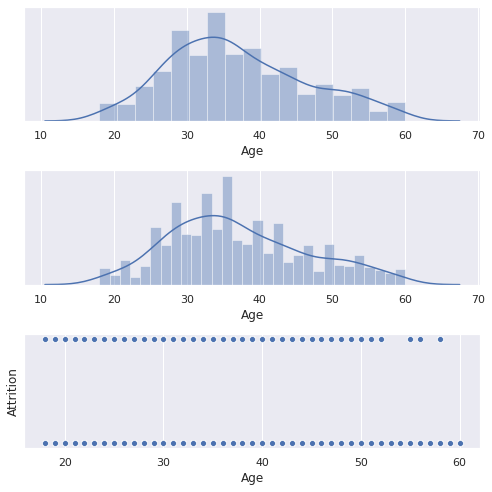

In [26]:
sns.set()
f, axes = plt.subplots(3, figsize=(7, 7))
sns.distplot(df['Age'],ax= axes[0]);
sns.distplot(df['Age'],bins = 30,ax = axes[1]);
ax = sns.scatterplot(x="Age", y="Attrition", data=df,ax = axes[2])
plt.setp(axes, yticks=[])
plt.tight_layout()
total = (df['Attrition']==1).sum()
def check(row):
    if row.Age > 50 and row.Attrition == 1 :
        return True
    else:
        return False
df.loc[:, 'cond'] = df.apply(check, axis = 1)
req =  df.cond.sum()
# print(df.columns)
print("probability that more than 50 years  leave the company is :",req/total)
if req/total >0.5:
    print("so, its likely")
else:
    print("so, Its not likely")

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

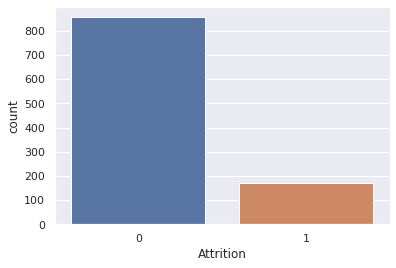

In [27]:
# Get a series of counts of values of Attrition
count_Attrition = df.Attrition.value_counts()
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(x="Attrition", data=df)

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

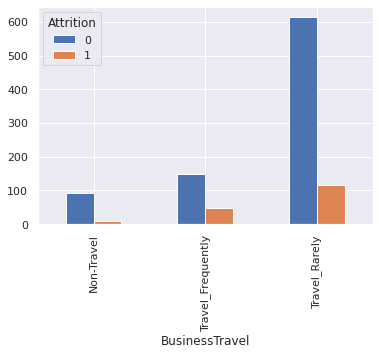

In [28]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 

ct = pd.crosstab( df["BusinessTravel"],df["Attrition"])

ct.plot.bar()
plt.show()

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

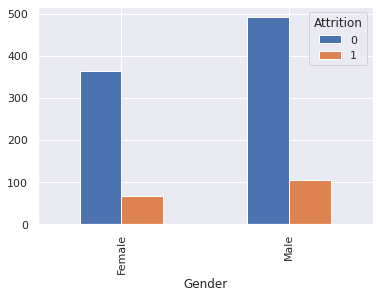

In [29]:
# Draw a stacked bar chart between Attrition and Gender 
ct = pd.crosstab( df["Gender"],df["Attrition"])

ct.plot.bar()
plt.show()


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

skewness: 1.7724925350968725


'By observation its left skewed'

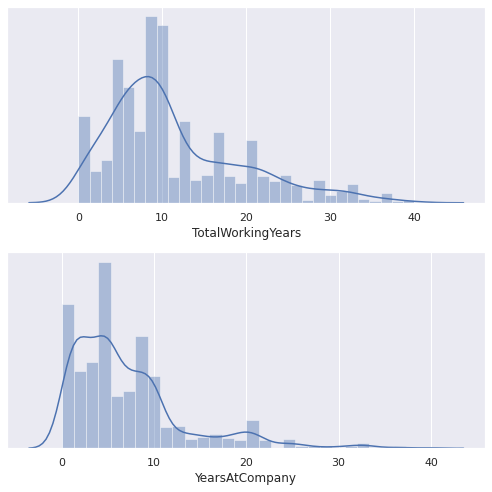

In [30]:
# Draw a histogram of TotalWorkingYears with 30 bins
sns.set()
f, axes = plt.subplots(2, figsize=(7, 7))
sns.distplot(df['TotalWorkingYears'],bins = 30,ax = axes[0]);
# Draw a histogram of YearsAtCompany
sns.distplot(df['YearsAtCompany'],bins = 30,ax = axes[1]);
plt.setp(axes, yticks=[])
plt.tight_layout()


print("skewness:",df['YearsAtCompany'].skew())
"By observation its left skewed"

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


'By observation there are outliers in human Resources and Research & Development'

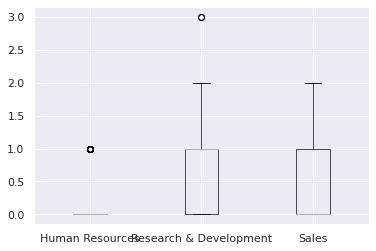

In [31]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
ct = pd.crosstab( df["MonthlyIncome"],df["Department"])
daf = pd.DataFrame(ct)
boxplot = daf.boxplot()
"""By observation there are outliers in human Resources and Research & Development"""

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

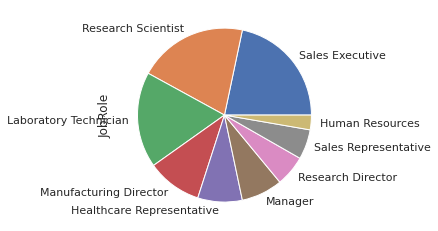

In [32]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
daf = df.JobRole.value_counts()
plot = daf.plot.pie()
